<div>
<img src="https://drive.google.com/uc?export=view&id=1vK33e_EqaHgBHcbRV_m38hx6IkG0blK_" width="350"/>
</div> 

#**Artificial Intelligence - MSc**
ET5003 - MACHINE LEARNING APPLICATIONS 

###Instructor: Enrique Naredo
###ET5003_Etivity-1

In [1]:
#@title Current Date
Today = '2021-09-15' #@param {type:"date"}


In [2]:
#@markdown ---
#@markdown ### Enter your details here:
Student_ID = "9312951" #@param {type:"string"}
Student_full_name = "Michael Scally" #@param {type:"string"}
#@markdown ---

In [3]:
#@title Notebook information
Notebook_type = 'Etivity' #@param ["Example", "Lab", "Practice", "Etivity", "Assignment", "Exam"]
Version = 'Final' #@param ["Draft", "Final"] {type:"raw"}
Submission = True #@param {type:"boolean"}

##Introduction

###Problem Description
In this Etivity, we are looking to build a multi-class classifier machine learning algorithm in order to to classify the data from the MNIST dataset correctly. We will use the data from the MNIST dataset to train our model, and then validate this model using our validation set. We will identify the digits from the dataset which are most difficult to classify, and we can decide not to classify certain digits based on our threshold for incorrect classification.

We are looking to build a baseline general logistic regression machine learning algorithm that we can use to validate the results of our second model. The main model we will use is the Bayesian multinomial logistic regression model that will be used to classify the data from the MNIST dataset into its specific classes. Wittenauer (2016) utilises a general logistic regression and Bayesian model to predict house prices based on the size of the house and the number of rooms. In that instance, there was two input features (size of house and number of rooms), but in our instance we have a set of 784 features representing the pixels in each of the 28x28 images.

We will begin by building an initial general logistic regression model to set a baseline accuracy with all the data. We will use the Bayesian approach to identify the most difficult digits to classify, remove these from our dataset and then as we do this recursively, we should see the accuracy improve. 

In our model, we are trying to learn the following function:

$$
\alpha_j+\beta_j^T x
$$
for each class $j=1,\dots,k$. 

In our instance, we have selected 3 classes for the classification problem.
Alpha is our intercept term, and beta is the weighting for each of our input features in predicting our output. The method section below gives full details on how this was achieved. Here is a sample of the images from the dataset:

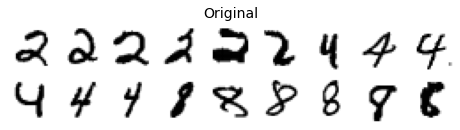

###Dataset:
We are using the MNIST dataset for this Etivity. Information on the dataset and download can be found [here](http://yann.lecun.com/exdb/mnist/).
The MNIST dataset is made up of a large volume of hand written digits that can be used to train machine learning algorithms to identify the digits and classify them. The dataset is made up of 60000 training images and 10000 test images. The first column in the dataset is the label for the specific digit, and the rest of the 784 columns (28x28) make up each of the 28x28 pixels greyscale values representing the brightness of the pixel

After loading the data, we display a few of the sample images to visualise them, as shown here:
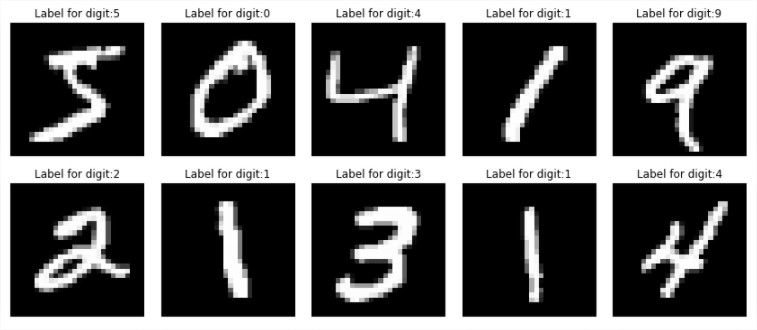

Before using the data, we transformed the input features to a common scale of 0-1 from their original values 0-255.
We select at random three of the 10 classes, and these will be used for the learning problem. We choose 1000 sample images of each of the 3 classes, in order to maximise learning but also to allow the model to excute within a reasonable time frame. One suggestion could be to use a larger number of the images from each class, to get a more accurate prediction, however this would come at a cost on performance,

The data was split into 80% for training, and 20% for validation. We will utilise the training data in order to train the model, and test the accuracy of the model using the validation set.

As can be seen from the following plot, the data is relatively evenly split between each of the classes and therefore no additional steps are required to normalise the classes:

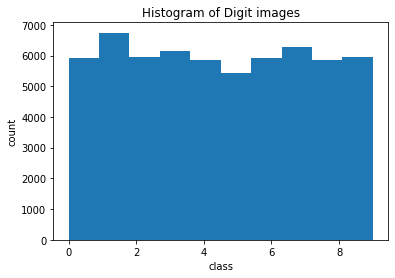



###Method
Out objective in this Etivity is to use a probabilistic programming approach in order to classify the images from our dataset correctly into the different classes. We train two different models, first using a General Logistic Regression model to train our data and calculate the accuracy. We then use the Bayesian logistic regression model on the same dataset for training. We use the posterior to determine the images that are most difficult to classify. The advantage of using the Bayesian approach in this instance is it can deal with uncertainty, and allows us to determine which images are too difficult to predict. Using the Bayesian model, we determine the most difficult digits, and we remove these from the dataset and run the General Logistic Regression model again on the modified dataset. We would expect to see an improvement in the overall accuracy of this model as we remove the unpredictable images. The General Logistic Regression model is used primarily as a baseline in order for us to determine how well our Bayesian model is performing, and also how we can improve accuracy by removing difficult to determine digits. 

The author in his paper (Wittenauer, 2016), gives an introduction to probabilistic programming, using a general logistic regression and a Bayesian model to predict house prices from the size of the house and the number of bedrooms. The author uses the PyMC3 library in order to solve the prediction problem. The size of the house and the number of bedrooms are represented by X1 and X2 input features, μ is the expected value, alpha is the intercept, beta values are used as coefficients for the input variables and the observation error is represend by sigma. From these the model calculates the posterior distribution for each of the unknown parameters.

In section 4 labelled below, we start off with our General Logistic Regression model, where we build our model to predict the classes for the hand written digits. This model is used as a baseline that we can compare our results from the Multinomial Logistic regression model to at a later date. We use the training data for model training, and validate the accuracy of the model using the validation data set. As discussed by Brownlee (2020), typically logistic regression is used as a binary classifier, however it has also been adapted to cover multi-class classification as we are doing here. To do this, we use the multi_class parameter, and set it to multinomial option, where it uses the cross-entrophy loss scheme for multi-class classification.

In Section 5, we start building the Bayesian approach to solving the same problem. For this machine learning problem, we are trying to solve for the following function:

$$
\alpha_j+\beta_j^T x
$$
for each class $j=1,\dots,k$. IN our instance, we have selected 3 classes for the classification problem.


We use our multinomial logistic regression model to solve for the unknown parameters α and β. From the above function, we expect to have β1, β2 ... β784, one for each of our input parameters, denoting the weight of each of the parameters, and α denotes the intercept. 

Bayes Theorem allows us to determine the probability of a particular event, given some previous experience that we have (called the prior). The general formula for Bayes Theorem is:

$$
P(A|B) = \frac{P(B|A) * P(A)}{P(B)} 
$$

We are trying to determine the probability of A occuring given that B has already occured. IN this instance, P(A) represents the probability of A occuring, and is known as the prior. We use inference to deduct properties of a distribution using the above Bayes Theorem.

In his online article (Brooks-Bartlett, 2021), the author shows a possible distribution for the probability of selling ice cream on a particular day, shown as a distribution with uncertainty as shown below. It shows that there may be multiple different distributions for the probability of selling ice cream, and is similar to our example for distributions for α and β.

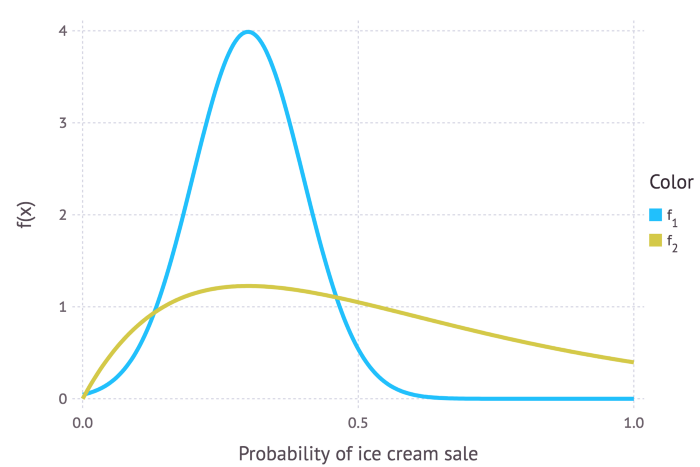

We start off in our model by encoding each of our 3 classes that we want to predict. We create a normal distribution for our initial prior  α and β values, calculate the likelohood as α + β2X1 + β2X2 + ..... for the initial model, calculate our probability and our observed values. We can then use the current posterior as the prior for the next iteration of the model, and we train the model on our data. Once our model is trained, we can sample the posterior which is a distribution for our α and β values, to solve for the function mentioned earlier. To determine the probability for a particular example we use the following to calculate the likelihood:

$$
p(y=j | \theta, x) = \frac{\exp(\alpha_j+\beta_{j}^T x)}{\sum_{c=1}^k\exp(\alpha_c+\beta_c^Tx)}.
$$

We can then use this to calculate the class with highest probability for each sample in our validation set. As mentioned, we use the posterior alpha and beta samples, and the softmax function to calculate the class. This gives us the predicted class from the Bayesian method for each validation sample, but importantly gives us the probability that it has classified the sample correctly. We can compare the accuracy of this output to our previos general recipe logistic regression model. The documentation on PyMC "Getting started with PyMC3" (Salvatier et al) gives a very good overview of using the PyMC3 library that is used extensively throughout to build the model. Fonnesbeck (2018) also provides a useful video on Probabilistic Programming and Bayesian Modeling with PyMC3.

In section 6, we look at a plot of the mean probability for each digit in our validation set. We can use this graph to determine the cutoff threshold for the most difficult digits to remove from our validation set. Once we remove the images, we re-run the prediction from the general recipe logistic regression model, and we should expect to see the accuracy score improving as we remove the most difficult images.


## 1.0 Libraries
We are using the PyMC3 library for the implementation of the Bayesian multinomial logistic regression model. An introduction to the library can be found [here](https://docs.pymc.io/notebooks/getting_started.html). PyMC3 is an open source probabilistic programming framework that uses Theano. 

In [4]:
# Suppressing Warnings:
import warnings
warnings.filterwarnings("ignore")

In [5]:
# Import libraries
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import scipy.optimize as optimize
from scipy.special import erf
import pandas as pd
import numpy as np
import seaborn as sns
from tqdm import tqdm
from skimage.io import imread, imshow
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
import arviz as az
from scipy.io import loadmat
import pymc3 as pm
import random
from IPython.display import HTML
import pickle
import theano as tt
import cv2
from sklearn.utils import shuffle
from skimage.color import rgb2gray

## 2.0 Dataset

This section deals with loading the dataset from Google Drive. 

We take a sneak peek at a few of the images

We normalise the input features into the scale 0-1

We look at the distribution of the data over our classes

### 2.1 Loading the MNIST dataset
Loading the dataset from Google Drive.

In [6]:
# Setting a seed:
np.random.seed(123)

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [8]:
# Path, copy the path from your Drive
Path = '/content/drive/My Drive/Colab Notebooks/data/mnist-data/'

# MNIST Data
train_data = Path + 'mnist_train.csv'
test_data = Path + 'mnist_test.csv'

# train data
df_train = pd.read_csv(train_data)
X_train = df_train.drop("label",axis=1).values
y_train = df_train.label.values
print(X_train.shape)

# test data
df_test = pd.read_csv(test_data)
X_test = df_test.drop("label",axis=1).values
y_test = df_test.label.values
print(X_test.shape)

(60000, 784)
(10000, 784)


### 2.2 Display the first few images
Display a few of the images to visualise before we start the normalisation or building the model

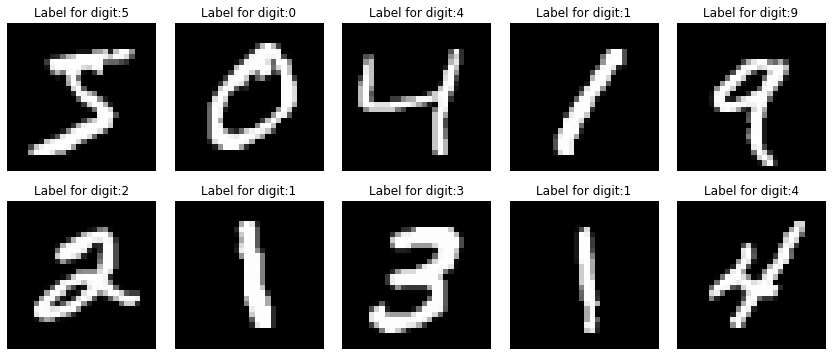

In [9]:
# setup figure to show images; 2 rows, 5 cols
fig, axs = plt.subplots(2,5, figsize=(15, 6))
# setup spaces between images
fig.subplots_adjust(hspace = .2, wspace=.001)
axs = axs.ravel()

#Take 10 random images from the X_train data to show, ensuring no repeats
sample_images = np.random.choice(X_train.shape[0], 10, replace=False)  

for i in range(10):
    image = X_train[i]
    axs[i].axis('off')
    # reshape and show the image
    pixels = X_train[i].reshape((28, 28))
    axs[i].imshow(pixels, cmap="Greys_r")
    # Show the labelled value for the image
    axs[i].set_title('Label for digit:' + str(y_train[i].astype(int)))

### 2.3 Normalise the Data:
Transform the input features to a common scale between 0 and 1, instead of 0 to 255 in the data. 

In [10]:
# Normalizing the Inputs:
X_train = X_train/255
X_test = X_test/255

# Printing the new input range of values:
minv = np.min(X_train)
maxv = np.max(X_train)
print(minv,maxv)

0.0 1.0


### 2.4 Description of Data:
We look at the size of the training and test sets, and the number of features and classes

In [11]:
# Number of examples
n_train =  len(X_train)
n_test =  len(X_test)

# Shape of the image, a series of 28 X 28 pixels
image_shape = X_train.shape[1]

# unique classes/labels in the training dataset.
alltotal = set(y_train)
n_classes = len(alltotal)

print("Number of Training examples =", n_train)
print("Number of Test examples =", n_test)
print("Image input shape =", image_shape)
print("Number of classes =", n_classes)

Number of Training examples = 60000
Number of Test examples = 10000
Image input shape = 784
Number of classes = 10


### 2.5 Class Distribution:
We look at how the data is distributed across the different classes

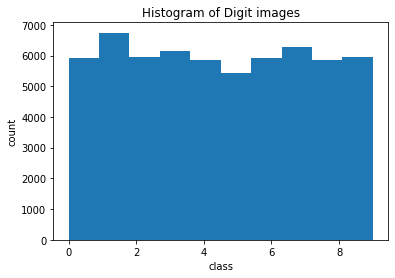

In [12]:
#Plot the distribution of each of the classes, to see if any class is over or under represented
fig, ax = plt.subplots()
ind = np.arange(n_classes)

n, bins, patches = ax.hist(y_train, n_classes)
ax.set_xlabel('class')
ax.set_ylabel('count')
ax.set_title(r'Histogram of Digit images')
plt.show()

## 3.0 Downsampling

### Randomly selecting 3 of the 10 Digit Classes

In [13]:
# Specify the number of classes we want to train on
n_classes = 3

# Empty list to append the random digit classes we select:
classes = []

# We select 3 digits at random and make sure they are unique:
while len(classes) < n_classes:
    
    # Randomly drawing a digit from 0-9:
    num2choose = np.random.randint(0,10)

    # Append the digit if it's not already in our list of classes:
    if num2choose not in classes: 
        classes.append(num2choose)
        
# Sorting the Classes smallest to largest    
classes.sort()
# print classes selected
print(classes)

[2, 4, 8]


### Selecting the images to use from the three classes for our train and test data

In [14]:
# Specify number of instances we'll keep for each of our 3 digits. We are choosing a fixed number of samples for each digit here and not using all the data, just to train the model faster while still achieving a high degree of accuracy
inst_class = 1000
X = []
labels = []

# Loop to randomly sample the instances for each digit:
for r in classes:
    imgs = X_train[np.where(y_train==r)[0],:]
    X.append(imgs[np.random.permutation(imgs.shape[0]),:][0:inst_class,:])
    labels.append(np.ones(inst_class)*r)
# Shaping inputs and labels in the right format    
X_train = np.vstack(X).astype(np.float64)
y_train = np.hstack(labels)

print('Shape of X_train:', X_train.shape)
print('Shape of y_train:', y_train.shape)

Shape of X_train: (3000, 784)
Shape of y_train: (3000,)


### New Classes Distribution for selected three classes

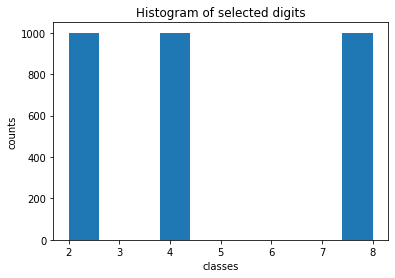

In [15]:
# new histogram for selected digits
fig, ax = plt.subplots()

n, bins, patches = ax.hist(y_train, len(alltotal))
ax.set_xlabel('classes')
ax.set_ylabel('counts')
ax.set_title(r'Histogram of selected digits')
plt.show()

### Display a few of the chosen images

In [16]:
# plot digits
def plot_digits(instances, images_per_row=5, **options):
    size = 28
    images_per_row = min(len(instances), images_per_row)
    images = [instance.reshape(size,size) for instance in instances]
    n_rows = (len(instances) - 1) // images_per_row + 1
    row_images = []
    n_empty = n_rows * images_per_row - len(instances)
    images.append(np.zeros((size, size * n_empty)))
    for row in range(n_rows):
        rimages = images[row * images_per_row : (row + 1) * images_per_row]
        row_images.append(np.concatenate(rimages, axis=1))
    image = np.concatenate(row_images, axis=0)
    plt.imshow(image,  cmap='gist_yarg', **options)
    plt.axis("off")

Text(0.5, 1.0, 'Original')

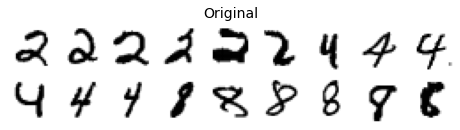

In [17]:
# Show a few instances from each Digit:
plt.figure(figsize=(8,8))
no_instances_to_show = 6
images_to_show_indexes = []

# Selecting a few label indices from each of the 3 classes to show:
for r in classes:
  indexes = np.where(y_train==r);
  images_to_show_indexes = np.append(images_to_show_indexes, np.random.choice(indexes[0], no_instances_to_show, replace=False)).astype(int)
    
# Plotting 'original' image
plot_digits(X_train[images_to_show_indexes,:],images_per_row=9)
plt.title("Original", fontsize=14)

###  Splitting the Training data into both Training and Validation Sets:

Split our data into Training and Validation sets, we choose 20% for validation and 80% for training

In [18]:
### Split tha dataset in training and validation sets, I will set aside 20% for validation
w = 0.20
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=w, random_state=0)
 
# Shuffling the training instaces around to randomize the order of inputs to the model:
X_train, y_train = shuffle(X_train, y_train)

In [19]:
# print shape of your validation and training set
print("Training input shape =", X_train.shape)
print("Training output shape =", y_train.shape)

print("Validation input shape =", X_val.shape)
print("Validation output shape =", y_val.shape)

Training input shape = (2400, 784)
Training output shape = (2400,)
Validation input shape = (600, 784)
Validation output shape = (600,)


## 4.0 General-Recipe ML
In this section, we will train a general recipe machine learning algorithm on our data. We will train the model on our training set, and validate the initial accuracy of the model using our validation data.

Accuracy= 0.9483333333333334
Maximum probability for any class: 1.0
Minimum probability for any class: 0.5111278175687682
Probability scores for observation hardest to classify: [0.51112782 0.00123473 0.48763745]


Text(0.5, 1.0, 'Hardest image to classify')

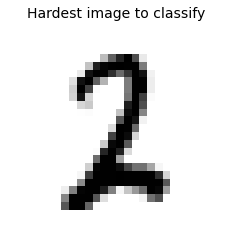

In [20]:
# model
model_log = LogisticRegression(random_state=0, max_iter=2000, C=100, solver='lbfgs', multi_class='multinomial').fit(X_train, y_train)

# Classification:
y_pred_log = model_log.predict(X_val)
y_pred_logi_prob = model_log.predict_proba(X_val)

# Maybe taking the maximum probability 
# in any of the classes for each observation
prob_classmax = np.max(y_pred_logi_prob,axis=1)
min_prob = np.amin(prob_classmax)
max_prob = np.amax(prob_classmax)

#Get the probability scores for each of the 3 classes for the image hardest to classify. This will return the probability for the image
#for each of the 3 classes 
prob_obs_hardest_classify = y_pred_logi_prob[np.argmin(prob_classmax)]

# Computing the original accuracy of the model
original_accuracy_score = accuracy_score(y_pred_log, y_val)

print("Accuracy=", original_accuracy_score)
print("Maximum probability for any class:", max_prob)
print("Minimum probability for any class:", min_prob)
print("Probability scores for observation hardest to classify:", prob_obs_hardest_classify)

#Plot image hardest to recognise
plot_digits(X_train[np.array([np.argmin(prob_classmax)]),:],images_per_row=9)
plt.title("Hardest image to classify", fontsize=14)

## 5.0 Probabilistic Multinomial Logistic Regression:
We will train our Bayesian Multinomial Logistic regression model in this section using the method described above.

The Multinomial Logistic Regression has some parameters:

- $\alpha$, which is the intercept term:

- $\beta$, which is a vector of coefficients which give a weighting to the importance of each input feature:

We are looking to solve for the function 

$$
\alpha_j+\beta_j^T x
$$


### 5.1 Initialising the Probabilistic ML Model:

We wil encode our predicted classes as follows:

- **[1,0,0]** for first digit
- **[0,1,0]** for second digit
- **[0,0,1]** for third digit

We create a normal distribution for our initial prior α and β values, calculate the likelohood as α + β2X1 + β2X2 for the initial model, calculate our probability and our observed values.

In [21]:
import sklearn.preprocessing

## Encode the class lables using the LabelBinarizer
## First digit  1 0 0
## Second Digit 0 1 0
## Third Digit  0 0 1
y_2_bin = sklearn.preprocessing.LabelBinarizer().fit_transform(y_train.reshape(-1,1))

#Number of features in the input data
nf = X_train.shape[1]

# number of classes we are looking to predict
nc = len(classes)
# floatX = float32
floatX = tt.config.floatX

print("Number of Features:", nf)
print("Number of Classes:", nc)

#We will initialise the prior with some random data for each beta class and feature
init_b = np.random.randn(nf, nc-1).astype(floatX)
print("init_b.shape:", init_b.shape)

#We will initialise the prior with some random data for alpha for each class
init_a = np.random.randn(nc-1).astype(floatX)
print("init_a.shape:", init_a.shape)

with pm.Model() as multi_logistic:
##    # Prior
  β = pm.Normal('beta', 0, sigma=100, shape=(nf, nc-1), testval=init_b)
  α = pm.Normal('alpha', 0, sigma=100, shape=(nc-1,), testval=init_a)
    
  # we need to consider nc-1 features because the model is not identifiable
  # the softmax turns a vector into a probability that sums up to one
  # therefore we add zeros to go back to dimension nc
  # so that softmax returns a vector of dimension nc
  β1  = tt.tensor.concatenate([np.zeros((nf,1)),β ],axis=1)
  α1  = tt.tensor.concatenate([[0],α ],)
    
  # Likelihood
  mu = pm.math.matrix_dot(X_train,β1) + α1

  # It doesn't work if the problem is binary
  p = tt.tensor.nnet.nnet.softmax(mu)
  observed = pm.Multinomial('likelihood', p=p, n=1, observed=y_2_bin)

Number of Features: 784
Number of Classes: 3
init_b.shape: (784, 2)
init_a.shape: (2,)


### 5.2 Fit our training data to the initial model and Initial Prediction
Here, we fit our data to our initial model, solving for alpha and beta terms. We can then draw from the posterior distribution to determine the distribution over alpha and beta, and use these values to predict the class of a specific digit

In [22]:
with multi_logistic:
    approx = pm.fit(3000, method='advi')

WARNING (theano.tensor.blas): We did not find a dynamic library in the library_dir of the library we use for blas. If you use ATLAS, make sure to compile it with dynamics library.


Finished [100%]: Average Loss = 10,706


In [23]:
#We draw samples from the model as our posterior which will allow us to predict new values
dd = 300
posterior = approx.sample(draws=dd)

test image #260
posterior sample #21
true class= 8.0
classes: [2, 4, 8]
estimated prob= [0.49878312 0.00054023 0.50067665]


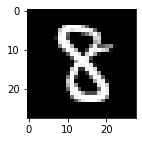

In [24]:
## The softmax function transforms each element of a collection by computing the exponential
#  of each element divided by the sum of the exponentials of all the elements.
from scipy.special import softmax

#select an image in the test set
i = random.randint(0, X_val.shape[0])

#select a sample in the posterior
s = random.randint(0, dd)

#Calculate the alpha and beta values from the posterior
beta  = np.hstack([np.zeros((nf,1)),  posterior['beta'][s,:] ])
alpha = np.hstack([[0],  posterior['alpha'][s,:] ])

image = X_val[i,:].reshape(28,28)
plt.figure(figsize=(2,2))
plt.imshow(image, cmap="Greys_r")
np.set_printoptions(suppress=True)

print("test image #" + str(i))
print("posterior sample #" + str(s))
print("true class=", y_val[i])
print("classes: " + str(classes))

#Here we calculat the estimated probability from the posterior alpha and beta values
print("estimated prob=",softmax((np.array([X_val[i,:].dot(beta) + alpha])))[0,:])

### 5.3 Bayesian Prediction
We can now use our posterior samples for alpha and beta distribution, to find the predicted class for each validation sample using the softmax function and highest posterior probability

In [25]:
# Bayesian prediction
# return the class that has the highest posterior probability for each digit in the validation set
y_pred_Bayesian=[]

#Calculate the 
for i in range(X_val.shape[0]):
    val=np.zeros((1,len(classes)))
    
    for s in range(posterior['beta'].shape[0]):
        beta = np.hstack([np.zeros((nf,1)),  posterior['beta'][s,:] ])
        alpha = np.hstack([[0],  posterior['alpha'][s,:] ])     
        val = val + softmax((np.array([X_val[i,:].dot(beta) + alpha])))
    
    mean_probability = val/posterior['beta'].shape[0]
    y_pred_Bayesian.append( np.argmax(mean_probability))

In [26]:
print(y_pred_Bayesian)

[0, 1, 1, 2, 2, 2, 2, 0, 1, 0, 1, 2, 0, 0, 1, 2, 1, 0, 0, 2, 2, 1, 1, 1, 2, 0, 1, 0, 1, 0, 2, 1, 2, 1, 1, 2, 2, 1, 2, 1, 1, 0, 0, 0, 0, 0, 2, 1, 2, 0, 1, 1, 2, 2, 0, 1, 2, 2, 2, 2, 2, 0, 2, 0, 2, 0, 1, 2, 2, 1, 1, 1, 1, 2, 0, 1, 0, 1, 1, 1, 1, 0, 0, 2, 0, 2, 2, 0, 1, 0, 1, 2, 0, 1, 0, 0, 2, 0, 0, 0, 2, 2, 1, 1, 0, 1, 2, 1, 0, 2, 2, 1, 1, 2, 1, 1, 2, 1, 2, 1, 0, 0, 2, 2, 0, 2, 1, 0, 2, 0, 1, 0, 2, 1, 0, 1, 2, 1, 2, 0, 2, 0, 2, 2, 2, 1, 1, 2, 1, 2, 0, 0, 2, 2, 0, 0, 1, 0, 0, 0, 2, 1, 0, 0, 2, 1, 1, 0, 1, 2, 0, 2, 2, 0, 1, 0, 1, 0, 2, 2, 0, 1, 2, 1, 2, 0, 1, 1, 2, 2, 2, 0, 0, 1, 1, 2, 0, 0, 0, 2, 0, 1, 0, 2, 2, 2, 2, 0, 2, 2, 1, 0, 1, 1, 2, 1, 0, 0, 0, 2, 0, 2, 2, 1, 2, 0, 1, 1, 0, 1, 2, 0, 2, 1, 1, 2, 2, 2, 1, 2, 1, 0, 2, 2, 0, 2, 2, 1, 2, 1, 1, 2, 1, 2, 0, 1, 2, 1, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 1, 0, 2, 0, 2, 2, 0, 2, 1, 1, 1, 1, 2, 0, 1, 0, 2, 0, 0, 1, 2, 0, 1, 1, 0, 2, 0, 0, 1, 2, 0, 2, 2, 0, 1, 1, 0, 2, 0, 1, 2, 2, 2, 2, 0, 1, 2, 0, 0, 0, 2, 2, 1, 1, 0, 1, 2, 1, 2, 2, 2, 0, 

In [27]:
print("Accuracy=", accuracy_score(np.array(classes)[y_pred_Bayesian], y_val))

Accuracy= 0.8683333333333333


In [28]:
# For each validation sample we get the class, Mean Probability and Standard Deviation
y_predB=[]

for i in range(X_val.shape[0]):
    val=[]

    for s in range(posterior['beta'].shape[0]):
        beta = np.hstack([np.zeros((nf,1)),  posterior['beta'][s,:] ])
        alpha = np.hstack([[0],  posterior['alpha'][s,:] ])
        val.append(softmax((np.array([X_val[i,:].dot(beta) + alpha])))[0,:])

    #mean probability
    valmean = np.mean(val,axis=0)
    #class with maximum mean probability
    classmax = np.argmax(valmean)
    #ranks
    ranks = np.array(val.copy())
    ranks   = ranks  *0 #init
    colmax = np.argmax(np.array(val),axis=1)
    ranks[np.arange(0,len(colmax)),colmax]=1
     
    y_predB.append( [classmax, valmean[classmax], np.std(ranks,axis=0)[classmax]])
  
y_predB= np.array(y_predB)

In [29]:
# Show the predicted, mean probability and standard deviation for first 10 samples
mm = 10
y_predB[0:mm,:]

array([[0.        , 0.69244352, 0.4567883 ],
       [1.        , 0.99524876, 0.05763872],
       [1.        , 0.72441995, 0.43492017],
       [2.        , 0.7656237 , 0.41647996],
       [2.        , 0.61474459, 0.4869862 ],
       [2.        , 0.99237298, 0.08137704],
       [2.        , 0.86570952, 0.33993463],
       [0.        , 0.61670882, 0.48455019],
       [1.        , 0.85146215, 0.34349511],
       [0.        , 0.6857296 , 0.46249324]])

In [30]:
#sorting in descending order, show the predicted class, mean probability and standard deviation for first 10 samples
difficult = np.argsort(-y_predB[:,2])
y_predB[difficult[0:mm],:]

array([[2.        , 0.50431629, 0.5       ],
       [1.        , 0.48867908, 0.49998889],
       [2.        , 0.50315628, 0.49998889],
       [2.        , 0.49933975, 0.49995555],
       [2.        , 0.49782368, 0.49995555],
       [1.        , 0.49067354, 0.49995555],
       [0.        , 0.47936595, 0.49989999],
       [1.        , 0.49542562, 0.49989999],
       [2.        , 0.50468427, 0.49989999],
       [0.        , 0.50357642, 0.49989999]])

In [31]:
#probability of general-recipe logistic regression in wrong instances
prob_classmax[y_pred_log != y_val]

array([0.59777781, 0.99998619, 0.99999875, 0.99990285, 0.93713002,
       0.99996846, 0.99834004, 0.84502746, 0.85930943, 0.95701367,
       0.53736404, 0.99976283, 0.99443554, 0.99999953, 0.59262867,
       0.80692617, 0.97877429, 0.99992075, 0.96722789, 0.89502539,
       0.93774887, 0.99996518, 0.70690408, 0.98831487, 0.94377837,
       0.8827076 , 0.99996926, 0.56234938, 0.99837757, 0.98545717,
       0.51112782])

In [32]:
#For the samples predicted incorrectly from the general-recipe model, show how the Bayesian prediction classified the same samples 
y_predB[y_pred_log != y_val,:]

array([[2.        , 0.95758301, 0.17950549],
       [2.        , 0.65749679, 0.46517619],
       [2.        , 0.68972327, 0.45825757],
       [2.        , 0.98678316, 0.11469767],
       [2.        , 0.64980952, 0.4748216 ],
       [1.        , 0.90407296, 0.28134597],
       [0.        , 0.82290303, 0.3756328 ],
       [2.        , 0.91772702, 0.26606181],
       [2.        , 0.73756209, 0.43863424],
       [2.        , 0.8617374 , 0.32102267],
       [1.        , 0.48456206, 0.49972215],
       [1.        , 0.46610529, 0.49982219],
       [1.        , 0.5370518 , 0.49781746],
       [2.        , 0.71615825, 0.44567053],
       [2.        , 0.75615636, 0.42708313],
       [1.        , 0.48867908, 0.49998889],
       [2.        , 0.81001594, 0.3756328 ],
       [2.        , 0.38673232, 0.48455019],
       [1.        , 0.74853632, 0.42083251],
       [1.        , 0.80482788, 0.36966952],
       [2.        , 0.61419335, 0.48538644],
       [2.        , 0.93523109, 0.24356154],
       [1.

### 5.4 Selecting Difficult and Easy Samples

In [33]:
## Calculate the accuracy of the General recipe model on the easiest and most difficult samples to predict based on the Bayesian approach

easy = np.argsort(y_predB[:,2])
print("Accuracy in easy instances =", accuracy_score(y_pred_log[easy[0:100]], y_val[easy[0:100]]))

difficult = np.argsort(-y_predB[:,2])
print("Accuracy in difficult instances =", accuracy_score(y_pred_log[difficult[0:100]], y_val[difficult[0:100]]))

Accuracy in easy instances = 0.99
Accuracy in difficult instances = 0.93


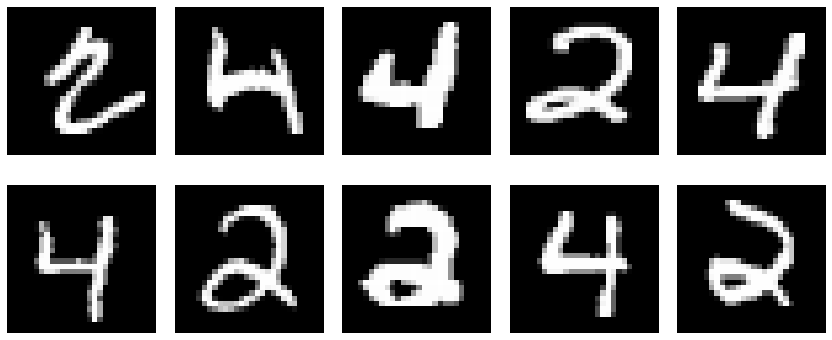

In [34]:
# show 10 random 'easy' images
fig, axs = plt.subplots(2,5, figsize=(15, 6))
fig.subplots_adjust(hspace = .2, wspace=.001)
axs = axs.ravel()

for i in range(10):
    index = easy[i]
    image = X_val[index,:].reshape(28,28)
    axs[i].axis('off')
    axs[i].imshow(image, cmap="Greys_r")
    

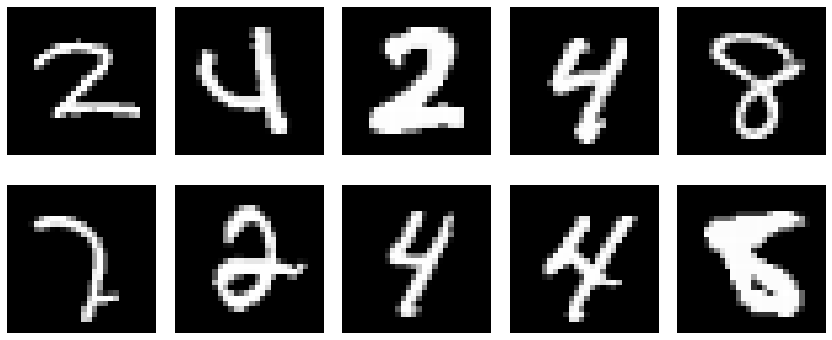

In [35]:
# show 10 random 'difficult' images
fig, axs = plt.subplots(2,5, figsize=(15, 6))
fig.subplots_adjust(hspace = .2, wspace=.001)
axs = axs.ravel()
for i in range(10):
    index = difficult[i]
    image = X_val[index,:].reshape(28,28)
    axs[i].axis('off')
    axs[i].imshow(image, cmap="Greys_r")
    

## 6.0 Removing the most difficult images
We plot the accuracy for each of our validation samples, to determine the cutoff for difficult samples. 

We remove the difficult samples from the dataset, and then run the accuracy across our general recipe machine learning algorithm recursively with more and more difficult samples removed

We can see as we remove the more difficult images, the acuracy continuously improves.


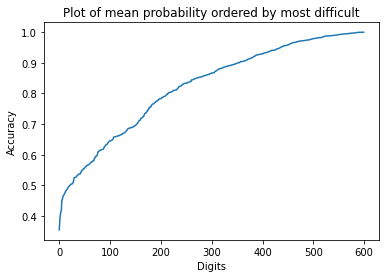

In [36]:
#Plot the mean probability for each of the validation samples, ordered by accuracy ascending. This will show us the samples 
#with uncertainty where the model cannot predict accurately.
y_predB_sort_difficult = np.sort(y_predB[:,1])

plt.plot(y_predB_sort_difficult)
plt.title('Plot of mean probability ordered by most difficult')
plt.xlabel('Digits')
plt.ylabel('Accuracy')
plt.show()

In [37]:
#Remove the most difficult images from the General Receipe ML
#From the above plot, there is approx 50 samples that are below 0.7 accuracy threshold, so we can remove these. This will vary depending on the samples in our dataset
difficult = np.argsort(-y_predB[:,2])
new_X_val = np.delete(X_val, difficult[0:50], axis=0)
new_Y_val = np.delete(y_val, difficult[0:50], axis=0)
new_Y_pred = model_log.predict(new_X_val)

In [38]:
#Calculate the Accuracy from the General Receipe ML algorithm with varying numbers of the most difficult samples removed
print('Original Accuracy score for General Receipe ML algorithm with (%s) difficult validation samples removed: %f' % (X_val.shape[0] - X_val.shape[0], original_accuracy_score))

new_accuracy = accuracy_score(new_Y_pred, new_Y_val)
print('New Accuracy Score for General Receipe ML algorithm with %s difficult validation samples removed: %f' % (X_val.shape[0] - new_X_val.shape[0], new_accuracy))

#Try again, removing even more of the difficult samples, in this case removing 100 samples
new_X_val = np.delete(X_val, difficult[0:100], axis=0)
new_Y_val = np.delete(y_val, difficult[0:100], axis=0)
new_Y_pred = model_log.predict(new_X_val)
new_accuracy = accuracy_score(new_Y_pred, new_Y_val)

print('New Accuracy Score for General Receipe ML algorithm with %s difficult validation samples removed: %f' % (X_val.shape[0] - new_X_val.shape[0], new_accuracy))

#Lets try again, this time we will remove another batch of difficult samples, to prove that our accuracy is improving
new_X_val = np.delete(X_val, difficult[0:250], axis=0)
new_Y_val = np.delete(y_val, difficult[0:250], axis=0)
new_Y_pred = model_log.predict(new_X_val)
new_accuracy = accuracy_score(new_Y_pred, new_Y_val)

print('New Accuracy Score for General Receipe ML algorithm with %s difficult validation samples removed: %f' % (X_val.shape[0] - new_X_val.shape[0], new_accuracy))

#Lets try again, this time we will remove all but the easiest 50 samples we should be getting an accuracy close to 1
new_X_val = np.delete(X_val, difficult[0:550], axis=0)
new_Y_val = np.delete(y_val, difficult[0:550], axis=0)
new_Y_pred = model_log.predict(new_X_val)
new_accuracy = accuracy_score(new_Y_pred, new_Y_val)

print('New Accuracy Score for General Receipe ML algorithm with %s difficult validation samples removed: %f' % (X_val.shape[0] - new_X_val.shape[0], new_accuracy))

Original Accuracy score for General Receipe ML algorithm with (0) difficult validation samples removed: 0.948333
New Accuracy Score for General Receipe ML algorithm with 50 difficult validation samples removed: 0.952727
New Accuracy Score for General Receipe ML algorithm with 100 difficult validation samples removed: 0.952000
New Accuracy Score for General Receipe ML algorithm with 250 difficult validation samples removed: 0.974286
New Accuracy Score for General Receipe ML algorithm with 550 difficult validation samples removed: 1.000000


## 7.0 Summary

Our goal in this Etivity was to use Probabilistic Multinomial Logistic Regression to build a model to classify images from the MNIST dataset into different classes. We loaded the data, selected three of the ten classes from the dataset and built a model to predict the classes for each of the images. We selected a number of images for each of the classes for our training and validation set.

IN section 4 we used a general logistic regression model with multi-class classification as a baseline classifier to predict our three classes, and calculated the accuracy of the model using the initial data. 

In section 5 we used a probabilistic multinomial logistic regression model to classify the same images as discussed above. Using this model, we were able to predict the images that were most difficult to classify. We then removed these from the dataset recursively, and evaluated the general recipe model accuracy with the difficult images removed. As can be seen from the following results, as we remove more difficult images, the accuracy improves. This shows how the Bayesian model deals with uncertainty, and we could decide not to classify certain images due to uncertainity, which gives it an advantahe over other machine learning algorithms.

**Following is results from one specific run of the model:**

- Original Accuracy score for General Receipe ML algorithm with (0) difficult validation samples removed: 0.948333

- New Accuracy Score for General Receipe ML algorithm with 50 difficult validation samples removed: 0.947273

- New Accuracy Score for General Receipe ML algorithm with 100 difficult validation samples removed: 0.954000

- New Accuracy Score for General Receipe ML algorithm with 250 difficult validation samples removed: 0.974286

- New Accuracy Score for General Receipe ML algorithm with 550 difficult validation samples removed: 1.000000

We can see from the results, as we remove the more difficult images from the data, the accuracy improves, and we eventually get an accuracy of 1 if we remove enough images.

In our peer group, we discussed how to determine the boundary between difficult and easy images, what would the best approach be. In the traffic light sample, it looks at samples from the validation data and builds an array based on mean and rank and sorts for easy and difficult images. We discussed one approach was to have a cutoff threshold on the probability to determine the images removed.

Anthony used a loss curve when removing more and more difficult samples, and it showed the accuracy stablilised when approx 750 samples were removed. However, it seems this is a large number to remove when the validation set was 3000 in total.

We discussed how the sampling of the posterior is used, the meaning of having a array of values for alpha and beta and what determines the best number of samples to choose in order to determine the most accurate probability for a specific class

In building the multinomial logistic regression model, the model considers nc-1 features, and the reason given is the model is not identifiable. We discussed the meaning of the model not being identifable, and Kenneth discovered that the function is not identifable, and as a result we need to constrain one of the parameters

Overall the models produced good results, but one modification in my solution would be to icnlude the full dataset for the three classes, where I only included 1000 samples for each class. This was a tradeoff I accepted as it helped to allow the model to train within a reasonable timeframe, and also produce satisfactory results. 

Certainly one of the benefits of using the probabilistic programming method is it allows us to deal with uncertainty in the model, where we can choose to exclude certain images that we are not able to classify with an acceptable degree of certainty. Also, using the general logist regression model it servers as a good benchmark to compare our probabilistic model with. 
One downside of the porbabilistic model seems to be the amount of time taken to train and validate the data is significantly more than with the general purpose model, and while it was manageable with our data, on larger datasets this could be a limiting factor.

I would suggest one improvement on the model would be a more methodological approach to removing the difficult images to classify. One suggestion was using a fuzzy logic approach, but I did not have the time to further investigate this but did sound promising from the lecture. 

Another improvement would be to use scikit-learn method of accessing the data, using fetch_openml. This would just allow for simpler access and execution of the Etivity as the Google Drive would not need to be mounted each time.

Overall, I believe the Etivity was a very good approach to understanding probabilistic logistic regression, and how it deals with uncertaintiy and allows us to decide what threshold or penalty we accept for classifying some of our data incorrectly.

## References

Wittenauer, J., 2016. An intro to probablistic programming. Medium. Available at: https://medium.com/@jdwittenauer/an-intro-to-probablistic-programming-de28cec81baf

Brownlee, J., 2020. Multinomial logistic regression with python. Machine Learning Mastery. Available at: https://machinelearningmastery.com/multinomial-logistic-regression-with-python/

Brooks-Bartlett, J., 2021. Probability concepts explained: Bayesian inference for parameter estimation. Medium. Available at: https://towardsdatascience.com/probability-concepts-explained-bayesian-inference-for-parameter-estimation-90e8930e5348 [Accessed September 18, 2021]. 

Salvatier, J., Wiecki, T., Fonnesbeck, C. Getting started with pymc3¶. Getting started with PyMC3 - PyMC3 3.10.0 documentation. Available at: https://docs.pymc.io/notebooks/getting_started.html

Fonnesbeck, C., 2018. Probabilistic programming and Bayesian modeling WITH PyMC3 - Christopher Fonnesbeck. YouTube. Available at: https://www.youtube.com/watch?v=M-kBB2I4QlE

## Function to export notebook to PDF in pretty style

In [39]:
#!wget -nc https://raw.githubusercontent.com/brpy/colab-pdf/master/colab_pdf.py
#from colab_pdf import colab_pdf
#Notebook must be stored in Colab Notebooks location under the name given below
#colab_pdf('Etivity_1_MikeScally_9312951.ipynb')